<img src="./images/Logo1.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="700 px" align="center">

# 第四章　構成した回路を観測する <a id='a1'></a>

**本章の内容**　　　　　[全体目次](./Contents.ipynb)
- [第四章　構成した回路を観測する](#a1)
  - [観測の原理](#a2)
  - [回路の出力を観測する](#a3)

## 観測の原理 <a id='a2'></a>
### qubitを観測すると、重ね合わせの状態は失われて、古典bit 0か1が観測される
一般に、n個の基底からなる量子の状態を観測すると、重ね合わせの状態は失われて、その基底の一つが観測される。

### qubit $|\psi\rangle=\alpha |0\rangle+\beta|1\rangle$を観測した時、$|0\rangle$ (古典bit 0に対応)が観測される確率は$|\alpha|^2$、$|1\rangle$ (古典bit 1に対応)が観測される確率は$|\beta|^2$に等しい
一般に、先の量子の状態 $|\psi\rangle$を観測した時、重ね合わせの状態が失われて、基底$|i\rangle$が観測される確率は、$|\alpha_i|^2$に等しい。
$|\alpha_0|^2+|\alpha_1|^2+|\alpha|_2|^2+\cdots + |\alpha_{n-1}|^2=1$という条件は、観測によって、いずれかの基底が観測されるという条件と等しい。

**コードのインポート**

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

# Import Aer
from qiskit import BasicAer

## 回路の出力を観測する <a id='a3'></a>


### 量子ゲート $H$ 一つからなる回路の出力を観測する　$H|0\rangle$


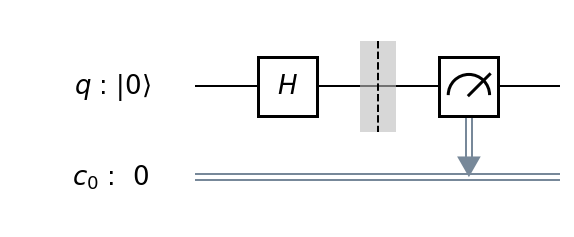

In [2]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circH = QuantumCircuit(q)

# qubit 0 に H ゲートを追加する。
circH.h(q[0])

# 1bitの古典レジスターを生成する
c = ClassicalRegister(1, 'c')

# 計測を含む量子回路を生成する
meas = QuantumCircuit(q, c)
meas.barrier(q)

# qubit 0 の計測結果を古典ビットにうつす
meas.measure(q,c)

# Qiskit の回路オブジェクトは、'+' 演算子で回路の合成を
# サポートしている
qc = circH+meas

# 回路を描画する
qc.draw(output='mpl')

<div class="alert alert-block alert-info">
　　
$$ H |0\rangle  = \frac{1}{\sqrt{2} }\begin{pmatrix} 1 & 1\\  1 & -1 \\\end{pmatrix} \left( \begin{array}{c} 1\\ 0 \end{array} \right)  = \frac{1}{\sqrt{2} } \left( \begin{array}{c} 1\\ 1 \end{array} \right) = \frac{1}{\sqrt{2} } |0\rangle + \frac{1}{\sqrt{2} }|1\rangle $$
</div>

In [3]:
# Aerのqasm_simulatorを利用する
backend_sim = BasicAer.get_backend('qasm_simulator')

# 回路を qsam_simulator上で走らせる
# 実行の繰り返しの回数を shotsに指定する
# デフォールト値は、1024　である
job_sim = execute(qc, backend_sim, shots=1024)

# jobから結果を取り出す
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'1': 511, '0': 513}


<div class="alert alert-block alert-info">　
先の計算結果から　$ H |0\rangle  = \frac{1}{\sqrt{2} } |0\rangle + \frac{1}{\sqrt{2} }|1\rangle $である。
これから、 0を観測する確率は、$( \frac{1}{\sqrt{2} })^2 = \frac {1} {2}$、1を観測する確率は、$( \frac{1}{\sqrt{2} })^2 = \frac {1} {2}$ に等しいことがわかる。シミューレーションの結果は、それを裏付けている。


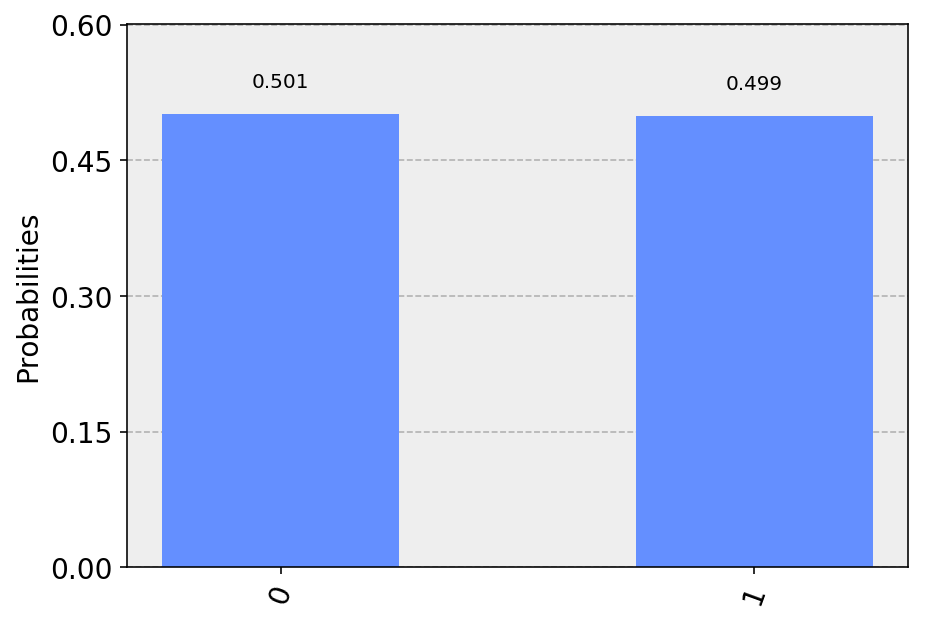

In [4]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)


### 量子ゲート $H$ 一つからなる回路の出力を観測する $H|1\rangle$


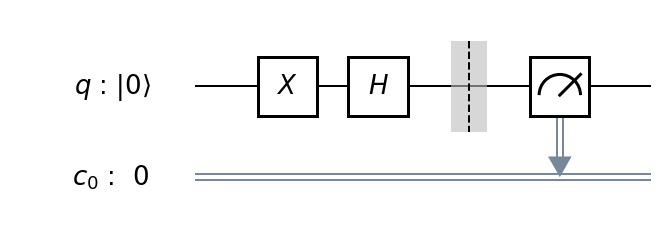

In [5]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circH = QuantumCircuit(q)

# qubit 0 に X ゲートを追加する。
circH.x(q[0])

# qubit 0 に H ゲートを追加する。
circH.h(q[0])

# 1bitの古典レジスターを生成する
c = ClassicalRegister(1, 'c')

# 計測を含む量子回路を生成する
meas = QuantumCircuit(q, c)
meas.barrier(q)

# qubit 0 の計測結果を古典ビットにうつす
meas.measure(q,c)

# Qiskit の回路オブジェクトは、'+' 演算子で回路の合成を
# サポートしている
qc = circH+meas

# 回路を描画する
qc.draw(output='mpl')

<div class="alert alert-block alert-info">
　　
$$ H |1\rangle  = \frac{1}{\sqrt{2} }\begin{pmatrix} 1 & 1\\  1 & -1 \\\end{pmatrix} \left( \begin{array}{c} 0\\ 1 \end{array} \right)  = \frac{1}{\sqrt{2} } \left( \begin{array}{c} 1\\ -1 \end{array} \right) = \frac{1}{\sqrt{2} } |0\rangle - \frac{1}{\sqrt{2} }|1\rangle $$
</div>

In [1]:
# Aerのqasm_simulatorを利用する
backend_sim = BasicAer.get_backend('qasm_simulator')

# 回路を qsam_simulator上で走らせる
# 実行の繰り返しの回数を shotsに指定する
# デフォールト値は、1024　である
job_sim = execute(qc, backend_sim, shots=1024)

# jobから結果を取り出す
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

NameError: name 'BasicAer' is not defined

<div class="alert alert-block alert-info">　
先の計算結果から　$ H |1\rangle  = \frac{1}{\sqrt{2} } |0\rangle - \frac{1}{\sqrt{2} }|1\rangle $である。
これから、 0を観測する確率は、$( \frac{1}{\sqrt{2} })^2 = \frac {1} {2}$、1を観測する確率は、$( -\frac{1}{\sqrt{2} })^2 = \frac {1} {2}$ に等しいことがわかる。シミューレーションの結果は、それを裏付けている。
 </div>

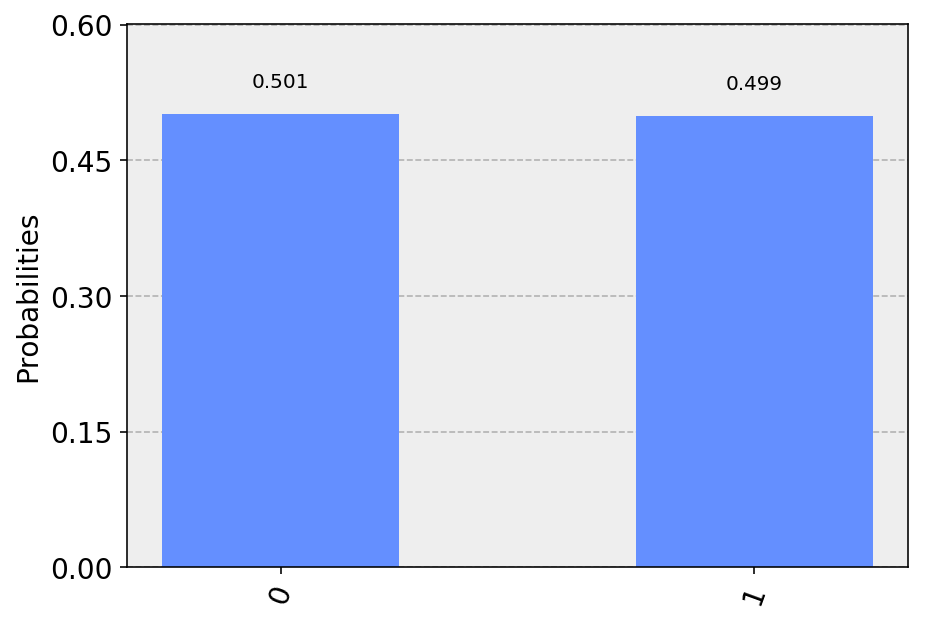

In [7]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

 <div class="alert alert-block alert-info">　
  
このことは、$H|0\rangleとH|1\rangle$の出力は、$|1\rangle$の成分の符号が反対であるにも関わらず、観測によっては区別がつかないことを意味している。 

<h3>もっと一般に、状態 $\alpha|0\rangle+\beta|1\rangle$と状態 $\alpha|0\rangle+e^{i\theta}\beta|1\rangle$は、$|e^{i\theta}\beta|^2=|e^{i\theta}|^2|\beta|^2=|\beta|^2$であるので、観測によっては区別がつかない。</h3>
</div>


### 量子ゲート $R_y (y=\pi/4)$ 一つからなる回路の出力を観測する


<div class="alert alert-block alert-info">
$R_y(\theta)$は、次の行列で表されるゲートである。

$$\begin{split}R_y(\theta) =
\begin{pmatrix}
\cos(\theta/2) & - \sin(\theta/2)\\
\sin(\theta/2) & \cos(\theta/2).
\end{pmatrix} \end{split}$$
</div>

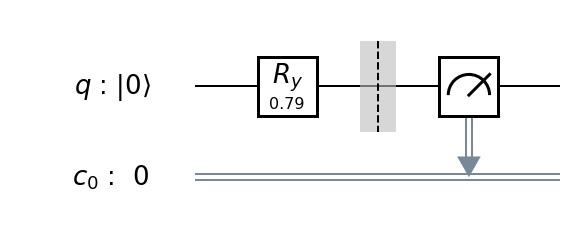

In [8]:
# 1 qubitの量子レジスターを生成する
q = QuantumRegister(1, 'q')

# q レジスターに作用する量子回路を生成する
circ = QuantumCircuit(q)

# qubit 0 に Ry (y=π/4)ゲートを追加する。
circ.ry(np.pi/4, q[0])

# 1bitの古典レジスターを生成する
c = ClassicalRegister(1, 'c')

# 計測を含む量子回路を生成する
meas = QuantumCircuit(q, c)
meas.barrier(q)

# qubit 0の計測結果を古典ビットにうつす
meas.measure(q,c)

# Qiskit の回路オブジェクトは、'+' 演算子で回路の合成を
# サポートしている
qc = circ+meas

# 回路を描画する
qc.draw(output='mpl')

<div class="alert alert-block alert-info">
    
$$\begin{split}R_y(\pi/4) |0\rangle =
\begin{pmatrix}
\cos(\pi/8) & - \sin(\pi/8)\\
\sin(\pi/8) & \cos(\pi/8).
\end{pmatrix} \end{split}\left( \begin{array}{c} 1\\ 0 \end{array} \right) =\left( \begin{array}{c} \cos(\pi/8)\\ \sin(\pi/8) \end{array} \right) = \cos(\pi/8)|0\rangle + \sin(\pi/8)|1\rangle$$

よって、

０が観測される確率は$|cos(\pi/8)|^2 \approx (0.92388)^2= 0.8536 $、

1が観測される確率は $| sin(\pi/8)|^2 \approx (0.38268)^2 = 0.1464 $となる
</div>

In [9]:
# Aerのqasm_simulatorを利用する
backend_sim = BasicAer.get_backend('qasm_simulator')

# 回路を qsam_simulator上で走らせる
# 実行の繰り返しの回数を shotsに指定する
# デフォールト値は、1024　である
job_sim = execute(qc, backend_sim, shots=1024)

# jobから結果を取り出す
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print(counts)

{'1': 150, '0': 874}


<div class="alert alert-block alert-info">
この値は、先の計算と、ほぼ一致する。


０が観測される確率は$|cos(\pi/8)|^2 = (0.92388)^2= 0.8536 $、

1が観測される確率は $| sin(\pi/8)|^2 = (0.38268)^2 = 0.1464 $となる
</div>

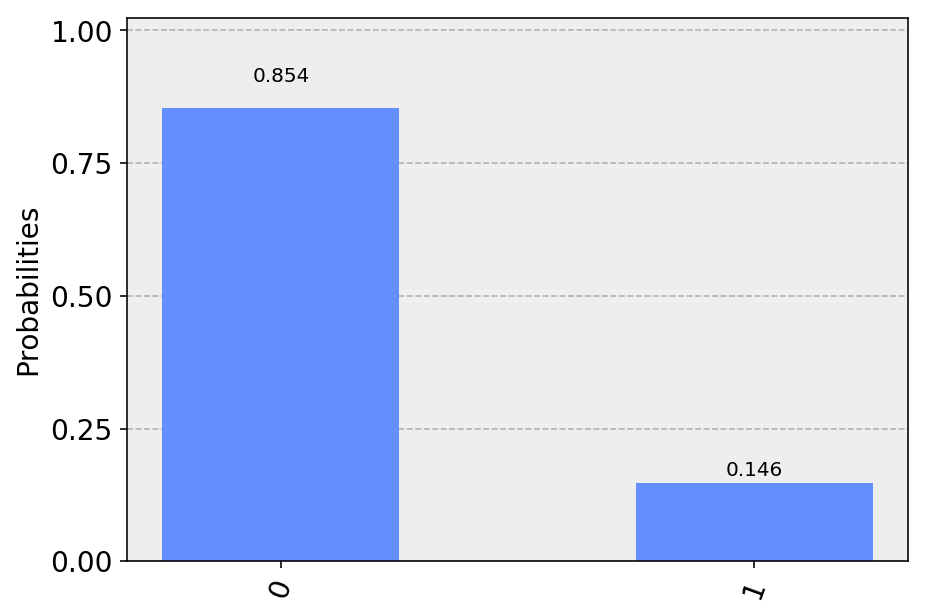

In [10]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

　
### 　　　　　　　　[前の章へ](./3_simulation.ipynb)　[全体目次](./Contents.ipynb)　 [次の章へ](./5_ibm_q.ipynb)